### **Retail : Demand Forecasting**

## Data loading and Description

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv("Demand Forecasting\data\train.csv")

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train.shape

(8523, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train.isna().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train.duplicated().any()

False

In [ ]:
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Observations:


*   The dimensions of our dataset are (8523, 12).

*   Missing values are present in the columns Outlet_Size and Item_Weight.

*   Our target column is Item_Outlet_Sales.

*   Some features exhibit minimal skewness, indicating that the data is nearly normally distributed. There are no columns with exceptionally high skewness.

*   There are no duplicate rows in the dataset.

*   Several features demonstrate high cardinality, such as Item_Visibility, Item_MRP, and Item_Outlet_Sales.



## Data Preprocessing:

In [ ]:
def prepare_data(train):
  train['Item_Weight'] = np.where(train['Item_Weight'].isna(),train['Item_Weight'].median(skipna = True),train['Item_Weight'])
  train['Outlet_Size'] = np.where(train['Outlet_Size'].isna(),train['Outlet_Size'].mode()[0], train['Outlet_Size'])
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('low fat', 'Low Fat')
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('LF', 'Low Fat')
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')
  train['Store_age'] = 2024 - train['Outlet_Establishment_Year']

  return train

In [ ]:
train_1=prepare_data(train)

In [ ]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Store_age                  8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [ ]:
train_1.isna().sum().sort_values(ascending=False)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Store_age                    0
dtype: int64

In [ ]:
train_1.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [ ]:
train_1.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Store_age'],
      dtype='object')

In [ ]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Store_age             8523 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


## Exploratory Data Analysis:

In [ ]:
labels = list(train_1['Item_Type'].unique())

<ipython-input-217-b078061b703e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(labels=labels, rotation=90)


[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

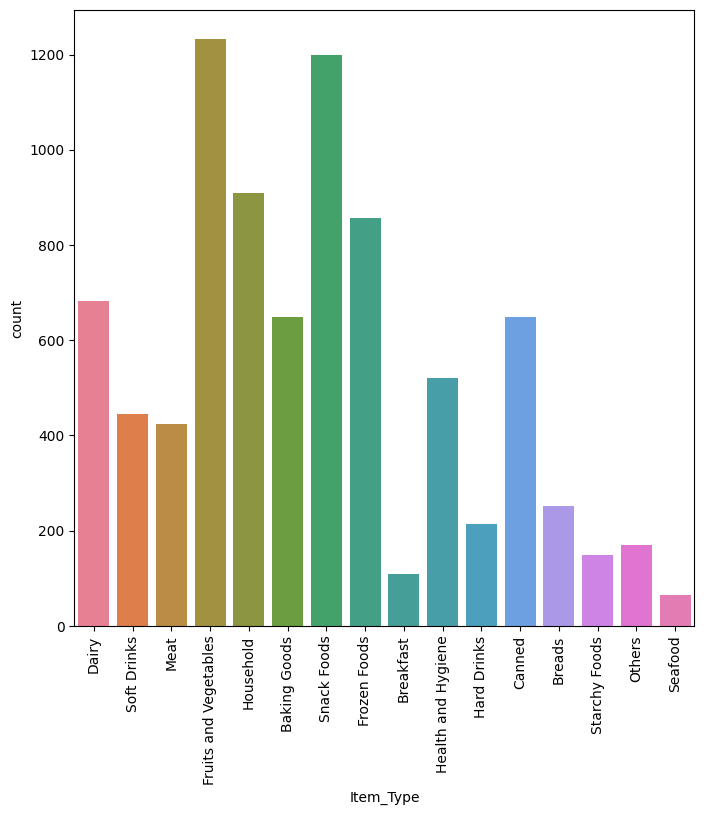

In [ ]:
plt.figure(figsize=(8,8))
chart = sns.countplot(x=train_1['Item_Type'],hue=train_1['Item_Type'],data=train_1)
chart.set_xticklabels(labels=labels, rotation=90)

In [ ]:
pd.crosstab(train_1['Outlet_Size'], train_1['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,1855,2418
Small,1458,930,0


In [ ]:
pd.crosstab(train_1['Item_Fat_Content'], train_1['Item_Type'])

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,329,140,41,341,418,450,630,214,520,910,170,169,37,692,374,82
Regular,319,111,69,308,264,406,602,0,0,0,255,0,27,508,71,66


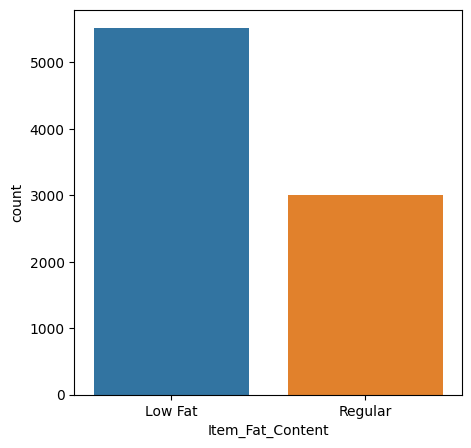

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content',hue=train_1['Item_Fat_Content'], data=train_1)
plt.show()

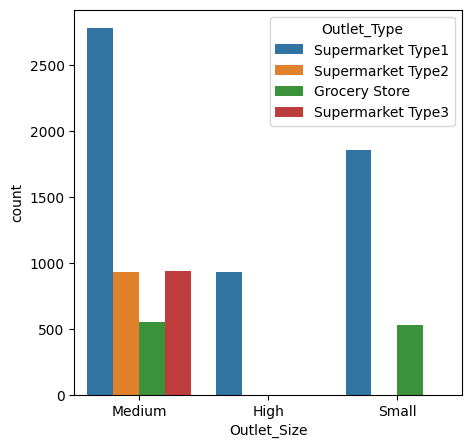

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Size',hue='Outlet_Type', data=train_1)
plt.show()

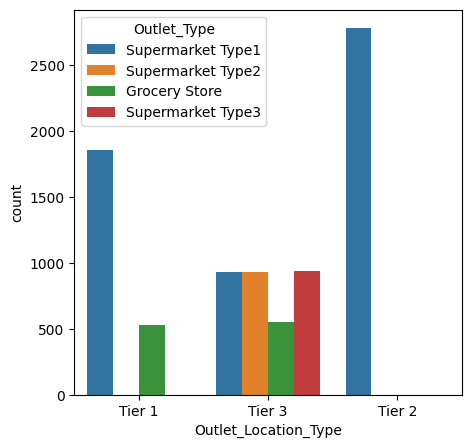

In [ ]:
# plot outlet_location_type
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Location_Type',hue='Outlet_Type',data=train_1)
plt.show()

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Item_Outlet_Sales'}>],
       [<Axes: title={'center': 'Store_age'}>, <Axes: >]], dtype=object)

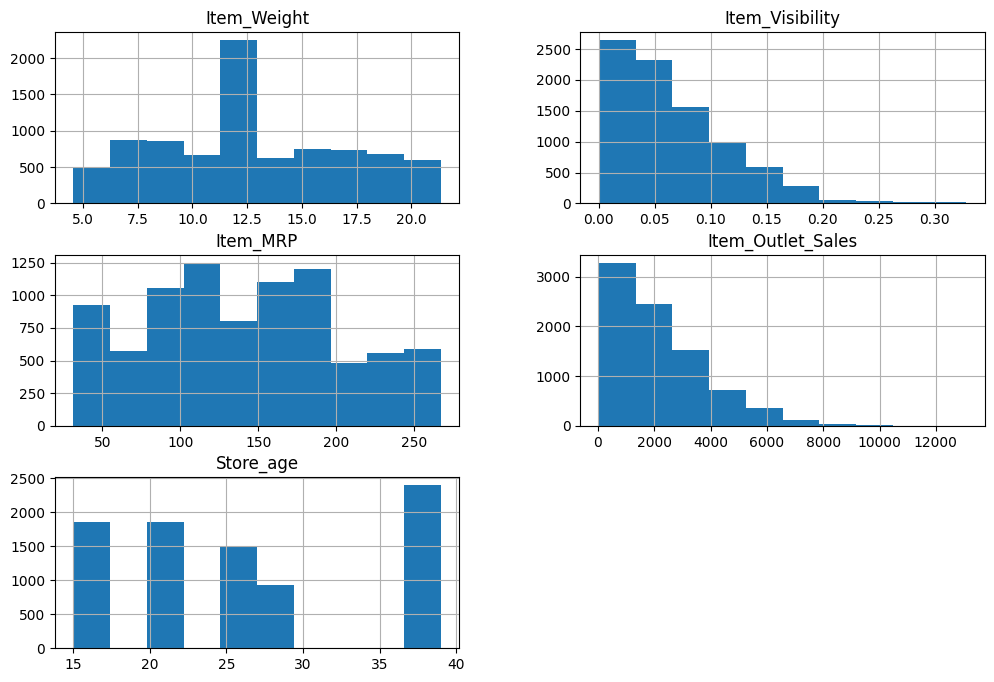

In [ ]:
#Data distribution of numerical values
train_1.hist(figsize=(12,8))

<ipython-input-224-c4fd46e2acb2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Store_age', data=train_1,palette='viridis')


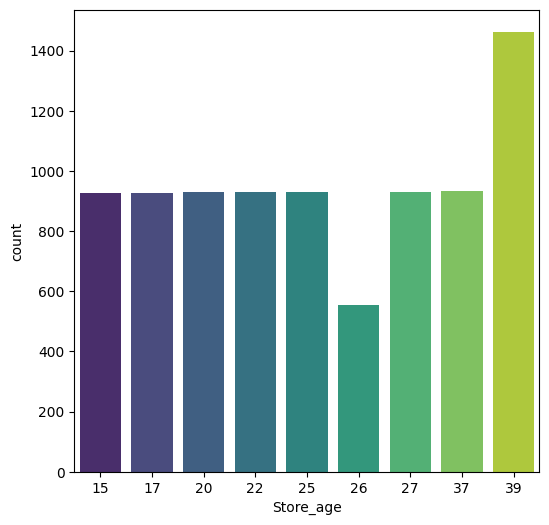

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Store_age', data=train_1,palette='viridis')
plt.show()

In [ ]:
numerical_columns = train_1.select_dtypes(include=['int64', 'float64']).columns

train_1_numerical = train_1[numerical_columns]

corr_matrix = train_1_numerical.corr()

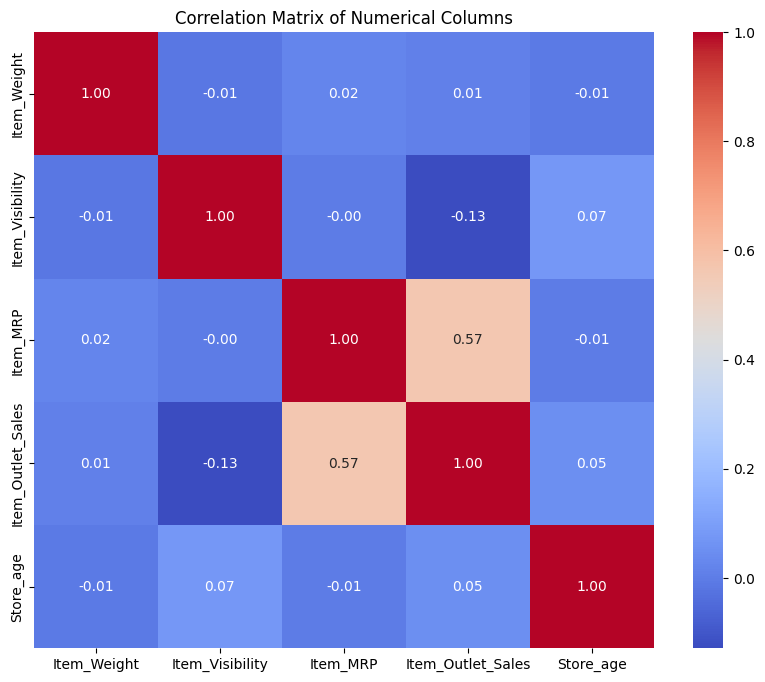

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

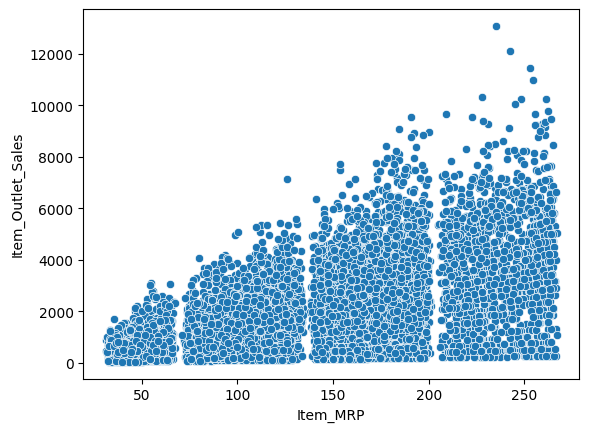

In [ ]:
sns.scatterplot(data=train_1, x='Item_MRP', y='Item_Outlet_Sales')

In [ ]:
train_1 = pd.get_dummies(train_1, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [ ]:
train_1.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Store_age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,25,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,443.4228,15,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,2097.2700,25,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,732.3800,26,False,True,False,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,994.7052,37,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [ ]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Item_Outlet_Sales                8523 non-null   float64
 4   Store_age                        8523 non-null   int64  
 5   Item_Fat_Content_Low Fat         8523 non-null   bool   
 6   Item_Fat_Content_Regular         8523 non-null   bool   
 7   Item_Type_Baking Goods           8523 non-null   bool   
 8   Item_Type_Breads                 8523 non-null   bool   
 9   Item_Type_Breakfast              8523 non-null   bool   
 10  Item_Type_Canned                 8523 non-null   bool   
 11  Item_Type_Dairy                  8523 non-null   bool   
 12  Item_Type_Frozen Foo

In [ ]:
train_1.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Store_age', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

## Data Modelling:

In [ ]:
x = train_1.drop(['Item_Outlet_Sales'], axis = 1)
y = train_1['Item_Outlet_Sales']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print("X Train Shape :",x_train.shape)
print("X Test Shape :",x_test.shape)
print("Y Train Shape :",y_train.shape)
print("Y Test Shape :",y_test.shape)

X Train Shape : (6818, 32)
X Test Shape : (1705, 32)
Y Train Shape : (6818,)
Y Test Shape : (1705,)


In [ ]:
# df to store model error and scores
model_scores = pd.DataFrame(columns=['Model', 'rmse', 'r2_score'])

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
def train_and_evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    pipeline = make_pipeline(StandardScaler(), model)

    pipeline.fit(X_train, y_train)

    # predict the validation set
    y_hat = pipeline.predict(X_test)

    # evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    model_score = r2_score(y_test, y_hat)

    # adding error and score, to the scores dataframe
    model_scores.loc[len(model_scores)] = [model_name, rmse, model_score]

    print('----------------------------------')
    print(model_name, ' Report:')
    print('----------------------------------')
    print('RMSE: ', rmse)
    print('R2 Score: ', model_score)

## Model Training and Evaluation

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg = LinearRegression()
train_and_evaluate_model('Linear Regression', linear_reg, x_train, x_test, y_train, y_test)

----------------------------------
Linear Regression  Report:
----------------------------------
RMSE:  1069.2649248908615
R2 Score:  0.5793450804905104


## Randomforest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr_model = RandomForestRegressor()
train_and_evaluate_model('Random Forest', rfr_model, x_train, x_test, y_train, y_test)

----------------------------------
Random Forest  Report:
----------------------------------
RMSE:  1095.8107823567143
R2 Score:  0.5581992290945393


## XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgbr_model = XGBRegressor()
train_and_evaluate_model('XGBoost', xgbr_model, x_train, x_test, y_train, y_test)

----------------------------------
XGBoost  Report:
----------------------------------
RMSE:  1138.8059681928755
R2 Score:  0.5228501413166616


## Light BGM Regressor

In [ ]:
import lightgbm as lgb

In [ ]:
lbgm_model = lgb.LGBMRegressor()
train_and_evaluate_model('Light BGM', lbgm_model, x_train, x_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 32
[LightGBM] [Info] Start training from score 2202.365232
----------------------------------
Light BGM  Report:
----------------------------------
RMSE:  1051.2784354929313
R2 Score:  0.5933780277763765


## Model Score Summary

In [ ]:
model_scores

,Model,rmse,r2_score
0,Linear Regression,1069.264925,0.579345
1,Random Forest,1095.810782,0.558199
2,XGBoost,1138.805968,0.522850
3,Light BGM,1051.278435,0.593378


Based on the model score table, the model that best fits this problem that presents the lowest RMSE and highest Score is **Light BGM Regressor**.

## Model Testing

## Test data loading and preprocessing

In [ ]:
test=pd.read_csv("test.csv")

In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test.isna().sum().sort_values(ascending=False)

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
test['Item_Weight'] = np.where(test['Item_Weight'].isna(),test['Item_Weight'].median(skipna = True),test['Item_Weight'])
test['Outlet_Size'] = np.where(test['Outlet_Size'].isna(),test['Outlet_Size'].mode()[0], test['Outlet_Size'])

In [ ]:
test.isna().sum().sort_values(ascending=False)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
test['Store_age'] = 2024 - test['Outlet_Establishment_Year']

In [ ]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('low fat', 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('LF', 'Low Fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg', 'Regular')

In [ ]:
test_1 = pd.get_dummies(test, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [ ]:
test_1.drop(['Item_Identifier', 'Outlet_Identifier','Outlet_Establishment_Year'], inplace = True, axis = 1)

In [ ]:
test_1.head()

,Item_Weight,Item_Visibility,Item_MRP,Store_age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,25,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,8.300,0.038428,87.3198,17,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
2,14.600,0.099575,241.7538,26,True,False,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
3,7.315,0.015388,155.0340,17,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
4,12.500,0.118599,234.2300,39,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True


In [ ]:
test_1.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Store_age',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [ ]:
results=test[['Item_Identifier', 'Outlet_Identifier']]

## Model Testing

In [ ]:
y_pred=lbgm_model.predict(test_1)
results['Sales Prediction']=y_pred

<ipython-input-259-d3a57fde606d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Sales Prediction']=y_pred


In [ ]:
results

,Item_Identifier,Outlet_Identifier,Sales Prediction
0,FDW58,OUT049,5932.767776
1,FDW14,OUT017,5808.139596
2,NCN55,OUT010,1044.095513
3,FDQ58,OUT017,5752.317212
4,FDY38,OUT027,5724.016196
...,...,...,...
5676,FDB58,OUT046,5972.389552
5677,FDD47,OUT018,5577.623536
5678,NCO17,OUT045,5779.241559
5679,FDJ26,OUT017,5770.752772
